#Predicting NFL Quarterback draft based on Previous Draft years from College Stats
Kiernan McKeegan

###This project is aimed at gathering statistics from the top 20 quarterbacks in 2023-2024 College football season. From those statistics we are seperating the quarterbacks into two groups: drafter and undrafted into the NFL. This project will use the Central Limit Theorem to understand how the statistics of drafted quarterbacks in college could lead to their future draft selection. If there is a high probability for a statistic that benefits the quarterback, then they were likely drafted.

##Importing Necessary Packages

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt', force_remount=True)
nb_path='/content/notebooks'
if os.path.exists(nb_path):
  os.unlink(nb_path)
  os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
  sys.path.insert(0,nb_path)

Mounted at /content/mnt


In [ ]:
import pandas as pd
from pandas import json_normalize
import numpy as np

##Import Data for College Statistics

In [ ]:
#college_stats=pd.read_csv('/content/mnt/My Drive/quarterback_training.csv')
#college_stats

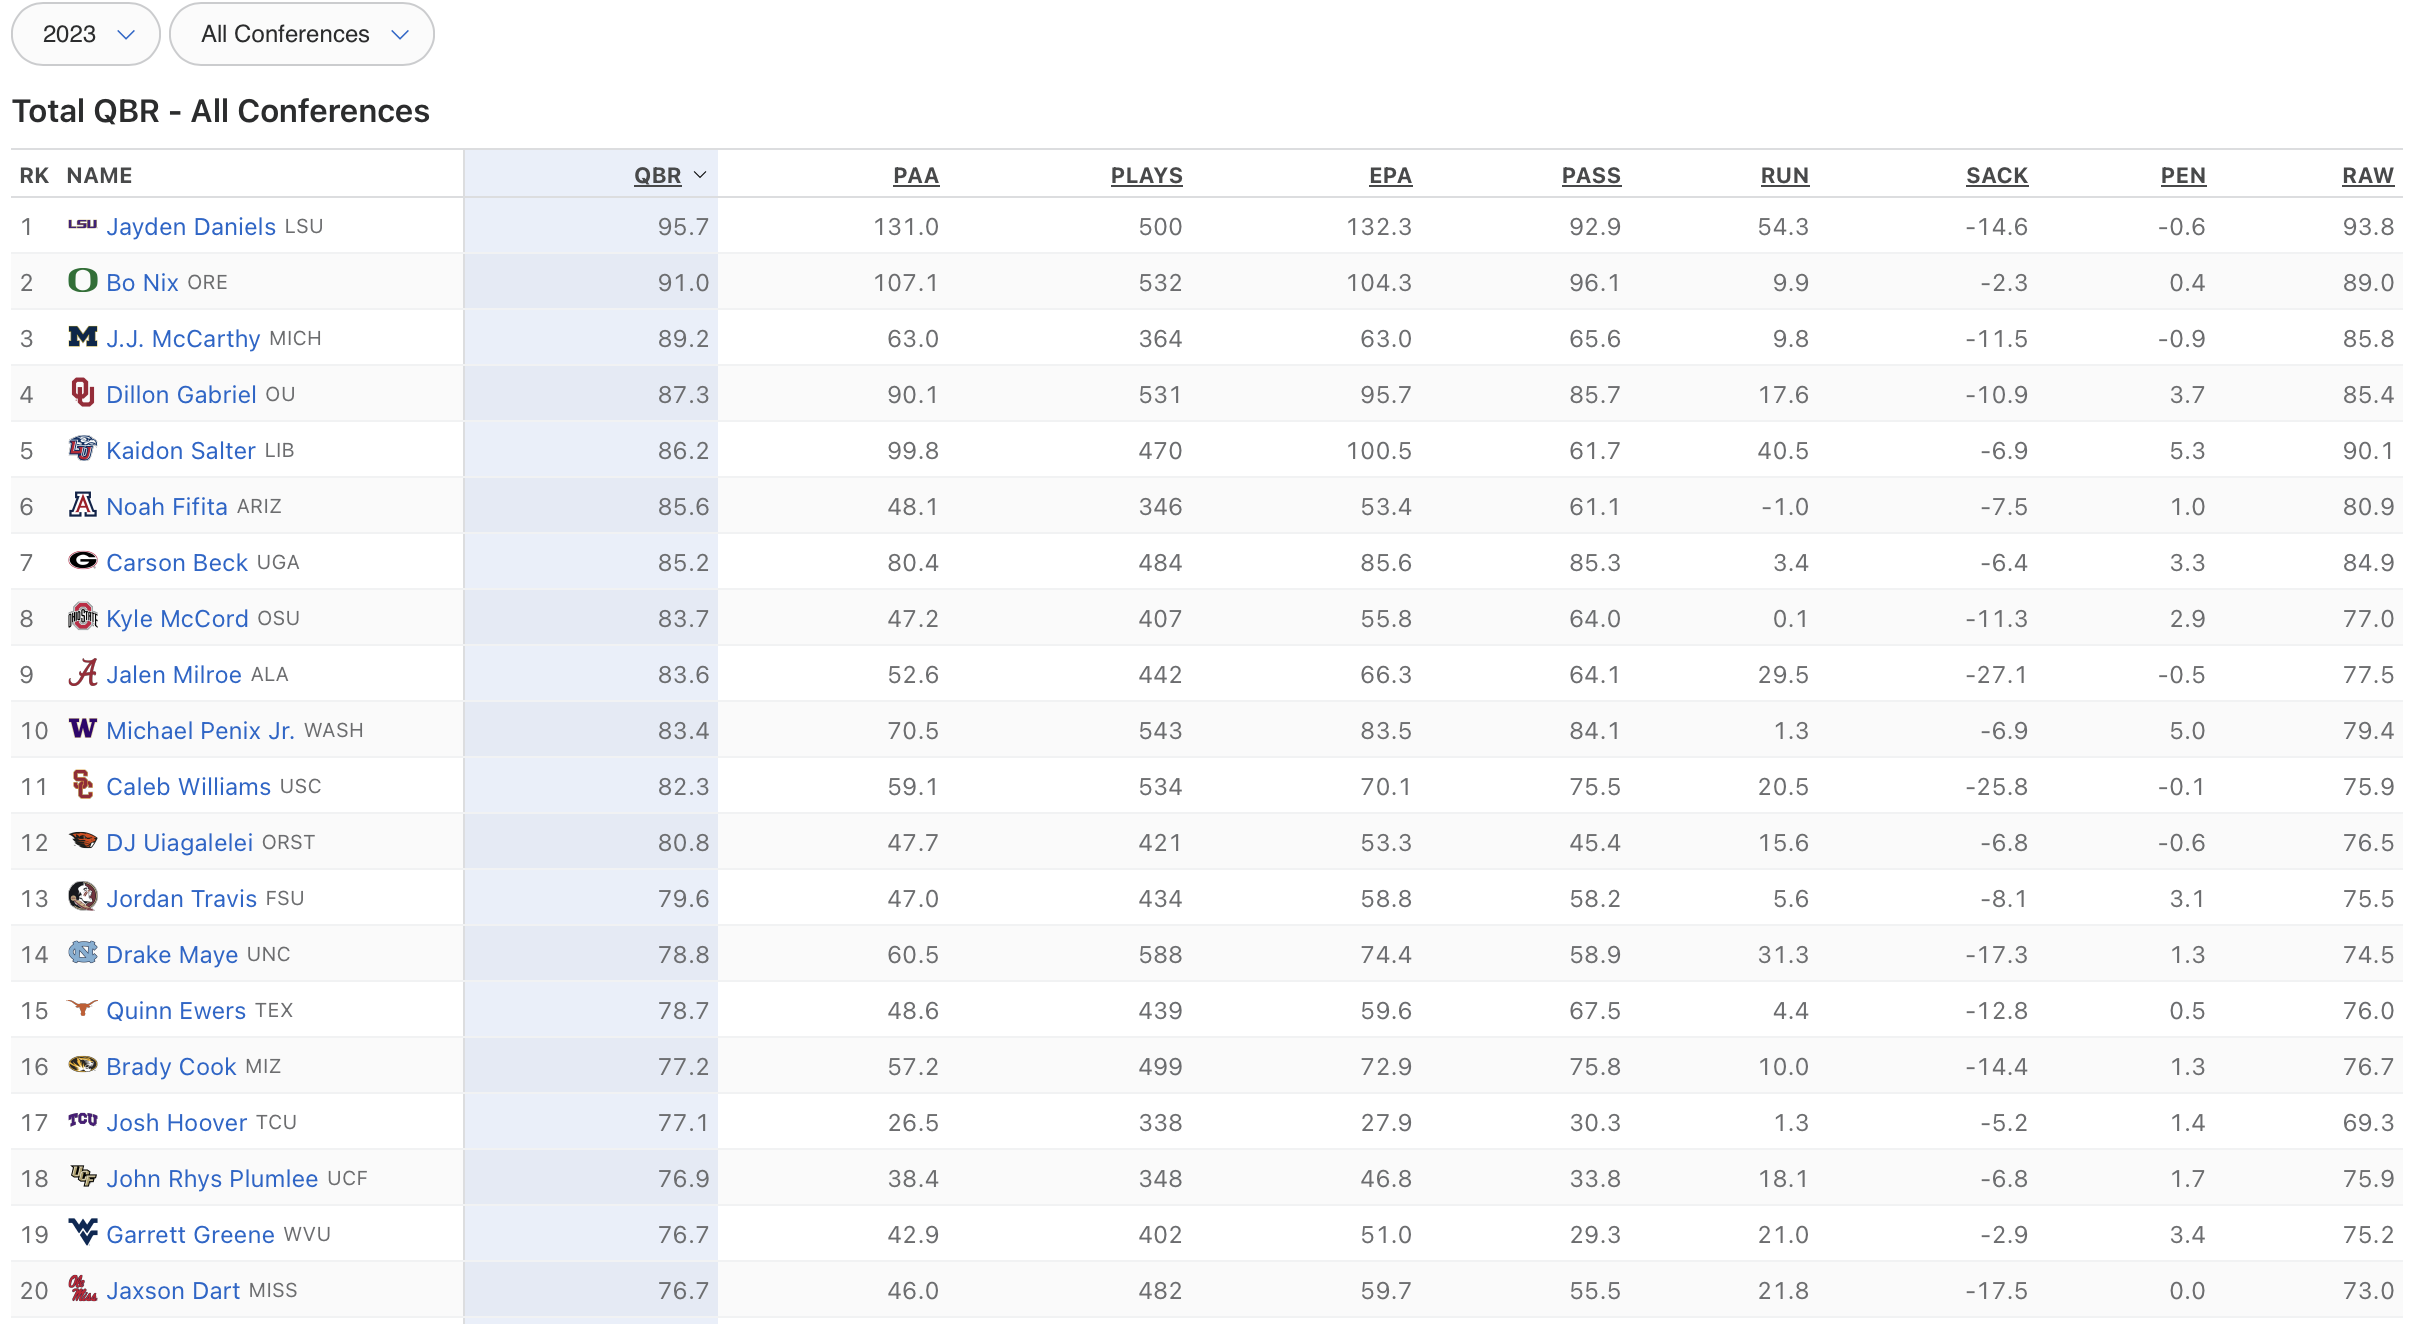

In [ ]:
top_qb = pd.DataFrame(columns=['name', 'passing yard', 'completion rate', 'yards per pass attempt', 'rushing yards', 'total sack', 'total TD', 'total INT', 'Drafted'])
top_qb.head()

,name,passing yard,completion rate,yards per pass attempt,rushing yards,total sack,total TD,total INT,Drafted


In [ ]:
top_qb.loc[0] = ['Jayden Daniels', 3812, 72.2, 11.7, 1134, 22, 40, 4, 1]
top_qb.loc[1] = ['Bo Nix', 4508, 77.4, 9.6, 234, 5, 45, 3, 1]
top_qb.loc[2] = ['J.J. McCarthy', 2991, 72.3, 9.0, 202, 19, 71, 22, 1]
top_qb.loc[3] = ['Dillon Gabriel', 3660, 69.3, 9.5, 149, 17, 37, 6, 0]
top_qb.loc[4] = ['Kaidon Salter', 1886, 61.0, 9.9, 579, 9, 32, 6, 0]
top_qb.loc[5] = ['Noah Fifita', 2869, 72.4, 8.6, -33, 19, 25, 6, 0]
top_qb.loc[6] = ['Carson Beck', 3941, 72.4, 9.5, 71, 11, 24, 6, 0]
top_qb.loc[7] = ['Kyle McCord', 3170, 65.8, 9.1, -65, 11, 16, 6, 0]
top_qb.loc[8] = ['Jalen Milroe', 2834, 65.8, 10.0, 531, 44, 23, 6, 0]
top_qb.loc[9] = ['Michael Penix Jr.', 4903, 65.4, 8.8, 8, 11, 36, 11, 1]
top_qb.loc[10] = ['Caleb Williams', 3633, 68.6, 9.4, 136, 33, 30, 5, 1]
top_qb.loc[11] = ['DJ Uiagalelei', 2638, 57.1, 8.4, 219, 11, 21, 7, 0]
top_qb.loc[12] = ['Jordan Travis', 2756, 63.9, 8.5, 176, 14, 20, 2, 1]
top_qb.loc[13] = ['Drake Maye', 3608, 63.3, 8.5, 449, 29, 24, 9, 1]
top_qb.loc[14] = ['Quinn Ewers', 3479, 69.0, 8.8, 75, 27, 22, 6, 0]
top_qb.loc[15] = ['Brady Cook', 3317, 66.1, 9.0, 319, 26, 21, 6, 0]
top_qb.loc[16] = ['Josh Hoover', 2206, 62.1, 7.4, 5, 8, 15, 9, 0]
top_qb.loc[17] = ['John Rhys Plumlee', 2271, 62.9, 8.9, 505, 12, 15, 8, 0]
top_qb.loc[18] = ['Garrett Greene', 2271, 62.9, 8.9, 772, 5, 16, 4, 0]
top_qb.loc[19] = ['Jaxson Dart', 3364, 65.1, 9.4, 391, 27, 23, 5, 0]

In [ ]:
top_qb

,name,passing yard,completion rate,yards per pass attempt,rushing yards,total sack,total TD,total INT,Drafted
0,Jayden Daniels,3812,72.2,11.7,1134,22,40,4,1
1,Bo Nix,4508,77.4,9.6,234,5,45,3,1
2,J.J. McCarthy,2991,72.3,9.0,202,19,71,22,1
3,Dillon Gabriel,3660,69.3,9.5,149,17,37,6,0
4,Kaidon Salter,1886,61.0,9.9,579,9,32,6,0
5,Noah Fifita,2869,72.4,8.6,-33,19,25,6,0
6,Carson Beck,3941,72.4,9.5,71,11,24,6,0
7,Kyle McCord,3170,65.8,9.1,-65,11,16,6,0
8,Jalen Milroe,2834,65.8,10.0,531,44,23,6,0
9,Michael Penix Jr.,4903,65.4,8.8,8,11,36,11,1


In [ ]:
import matplotlib.pyplot as plt

#Passing Yards Dataframe

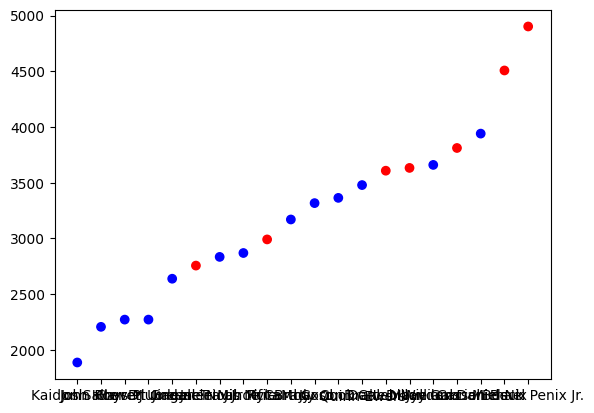

In [ ]:
#Creating database with only player name and passing yard columns and plot, make the points of the players who are drafter red
passing_yard_df = top_qb[['name', 'passing yard', 'Drafted']]
passing_yard_df=passing_yard_df.sort_values(by=['passing yard'], ascending=True)

passing_yard_df.loc[passing_yard_df['Drafted'] == 1, 'color'] = 'red'
passing_yard_df.loc[passing_yard_df['Drafted'] == 0, 'color'] = 'blue'
plt.scatter(passing_yard_df['name'], passing_yard_df['passing yard'], c=passing_yard_df['color'])


plt.show()

In [ ]:
#mean of players drafted and undrafted passing yards
passing_yard_df.groupby('Drafted')['passing yard'].agg('mean')

,passing yard
Drafted,
0,2915.846154
1,3744.428571


In [ ]:
#Calculating mean of players only who were drafted
passing_yard_df.drop(passing_yard_df[passing_yard_df['Drafted'] == 0].index, inplace = True)
passing_yard_df.groupby('Drafted')['passing yard'].agg('mean')

,passing yard
Drafted,
1,3744.428571


In [ ]:
#Now Calculating the Probability that the Drafted quarterbacks have more than 2915 (Average of Undrafted Players) passing yards using Central Limit Theorem
standard_dev=passing_yard_df.groupby('Drafted')['passing yard'].agg('std')
standard_error=standard_dev/np.sqrt(7)
z_score=(2915-passing_yard_df.groupby('Drafted')['passing yard'].agg('mean'))/standard_error
z_score
#P(Sample Mean > 2915) = P(Z > -2.87) = 1 - P(Z < -2.87) = 0.998 = 99.8% of Drafted Quarterbacks have greater than 2915 passing yards (Average of Undrafted Players)

,passing yard
Drafted,
1,-2.870941


###P(Sample Mean > 2915) = P(Z > -2.87) = 1 - P(Z < -2.87) = 0.998 = 99.8% of Drafted Quarterbacks have greater than 2915 passing yards (Average of Undrafted Players)

#Completion Rate Dataframe

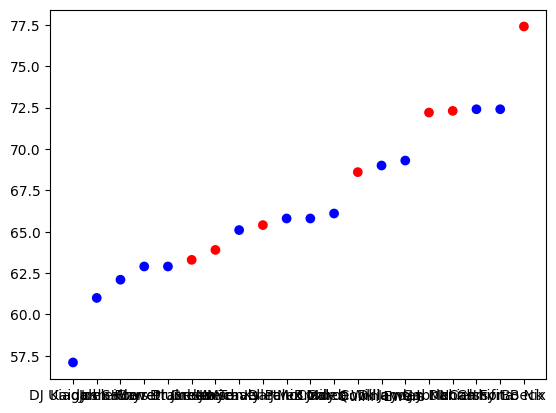

In [ ]:
#Creating Scatter plot based on completion rate instead of passing yards
completion_rate_df = top_qb[['name', 'completion rate', 'Drafted']]
completion_rate_df=completion_rate_df.sort_values(by=['completion rate'], ascending=True)

completion_rate_df.loc[passing_yard_df['Drafted'] == 1, 'color'] = 'red'
completion_rate_df.loc[passing_yard_df['Drafted'] == 0, 'color'] = 'blue'
plt.scatter(completion_rate_df['name'],completion_rate_df['completion rate'], c=completion_rate_df['color'])


plt.show()

In [ ]:
#Calculating mean of players who were drafted vs players who were not drafted
completion_rate_df.groupby('Drafted')['completion rate'].agg('mean')

,completion rate
Drafted,
0,65.530769
1,69.014286


In [ ]:
#Calculating mean of players only who were drafted
completion_rate_df.drop(completion_rate_df[completion_rate_df['Drafted'] == 0].index, inplace = True)
completion_rate_df.groupby('Drafted')['completion rate'].agg('mean')

,completion rate
Drafted,
1,69.014286


In [ ]:
#Now Calculating the Probability that the Drafted quarterbacks have more than 65 (Average of Undrafted Players) percentage of completion yards using Central Limit Theorem
standard_dev1=completion_rate_df.groupby('Drafted')['completion rate'].agg('std')
standard_error1=standard_dev1/np.sqrt(7)
z_score1=(65-completion_rate_df.groupby('Drafted')['completion rate'].agg('mean'))/standard_error1
z_score1
#P(Sample Mean > 65) = P(Z > -2.03) = 1 - P(Z < -2.03) = 0.978 = 97.8% of Drafted Quarterbacks have greater than 65 percent of completion yards (Average of Undrafted Players)

,completion rate
Drafted,
1,-2.035769


###P(Sample Mean > 65) = P(Z > -2.03) = 1 - P(Z < -2.03) = 0.978 = 97.8% of Drafted Quarterbacks have greater than 65 percent of completion yards (Average of Undrafted Players)

#Yards per Pass Attempt Dataframe

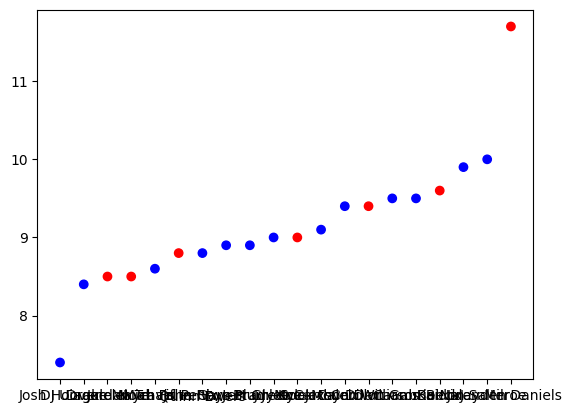

In [ ]:
#Creating Scatter plot based on yards per pass attempt
yards_pass_df= top_qb[['name', 'yards per pass attempt', 'Drafted']]
yards_pass_df=yards_pass_df.sort_values(by=['yards per pass attempt'], ascending=True)

yards_pass_df.loc[passing_yard_df['Drafted'] == 1, 'color'] = 'red'
yards_pass_df.loc[passing_yard_df['Drafted'] == 0, 'color'] = 'blue'
plt.scatter(yards_pass_df['name'],yards_pass_df['yards per pass attempt'], c=yards_pass_df['color'])


plt.show()

In [ ]:
#Calculating mean of players who were drafted vs players who were not drafted
yards_pass_df.groupby('Drafted')['yards per pass attempt'].agg('mean')

,yards per pass attempt
Drafted,
0,9.030769
1,9.357143


In [ ]:
#Calculating mean of players only who were drafted
yards_pass_df.drop(yards_pass_df[yards_pass_df['Drafted'] == 0].index, inplace = True)
yards_pass_df.groupby('Drafted')['yards per pass attempt'].agg('mean')

,yards per pass attempt
Drafted,
1,9.357143


In [ ]:
#Now Calculating the Probability that the Drafted quarterbacks have more than 9.0 (Average of Undrafted Players) yards per pass attempt using Central Limit Theorem
standard_dev2=yards_pass_df.groupby('Drafted')['yards per pass attempt'].agg('std')
standard_error2=standard_dev2/np.sqrt(7)
z_score2=(9.0-yards_pass_df.groupby('Drafted')['yards per pass attempt'].agg('mean'))/standard_error2
z_score2
#P(Sample Mean > 9.0) = P(Z > -0.85) = 1 - P(Z < -0.85) = 0.803 = 80.3% of Drafted Quarterbacks have greater than 9.0 (Average of Undrafted Players) yards per pass attempt

,yards per pass attempt
Drafted,
1,-0.847579


###P(Sample Mean > 9.0) = P(Z > -0.85) = 1 - P(Z < -0.85) = 0.803 = 80.3% of Drafted Quarterbacks have greater than 9.0 (Average of Undrafted Players) yards per pass attempt

#Rushing Yards Dataframe

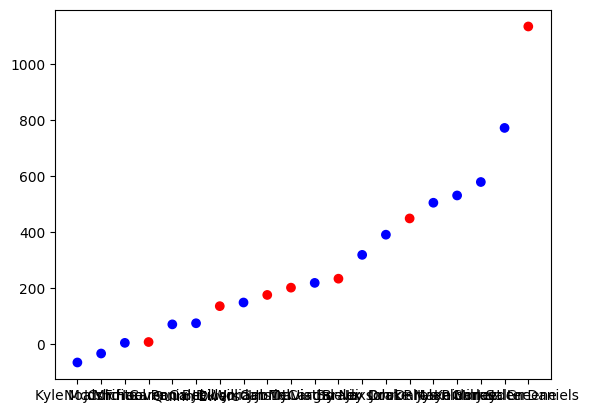

In [ ]:
#Creating Scatter plot based on rushing yards
rushing_yards_df= top_qb[['name', 'rushing yards', 'Drafted']]
rushing_yards_df=rushing_yards_df.sort_values(by=['rushing yards'], ascending=True)

rushing_yards_df.loc[passing_yard_df['Drafted'] == 1, 'color'] = 'red'
rushing_yards_df.loc[passing_yard_df['Drafted'] == 0, 'color'] = 'blue'
plt.scatter(rushing_yards_df['name'],rushing_yards_df['rushing yards'], c=rushing_yards_df['color'])


plt.show()

In [ ]:
#Calculating mean of players who were drafted vs players who were not drafted
rushing_yards_df.groupby('Drafted')['rushing yards'].agg('mean')

,rushing yards
Drafted,
0,270.615385
1,334.142857


In [ ]:
#Calculating mean of players only who were drafted
rushing_yards_df.drop(rushing_yards_df[rushing_yards_df['Drafted'] == 0].index, inplace = True)
rushing_yards_df.groupby('Drafted')['rushing yards'].agg('mean')

,rushing yards
Drafted,
1,334.142857


In [ ]:
#Now Calculating the Probability that the Drafted quarterbacks have more than 270 (Average of Undrafted Players) rushing yards using Central Limit Theorem
standard_dev3=rushing_yards_df.groupby('Drafted')['rushing yards'].agg('std')
standard_error3=standard_dev3/np.sqrt(7)
z_score3=(270-rushing_yards_df.groupby('Drafted')['rushing yards'].agg('mean'))/standard_error3
z_score3
#P(Sample Mean > 270) = P(Z > -0.45) = 1 - P(Z < -0.45) = 0.674 = 67.4% of Drafted Quarterbacks have greater than 270 (Average of Undrafted Players) rushing yards

,rushing yards
Drafted,
1,-0.450593


###P(Sample Mean > 270) = P(Z > -0.45) = 1 - P(Z < -0.45) = 0.674 = 67.4% of Drafted Quarterbacks have greater than 270 (Average of Undrafted Players) rushing yards

#Total Sacks Dataframe

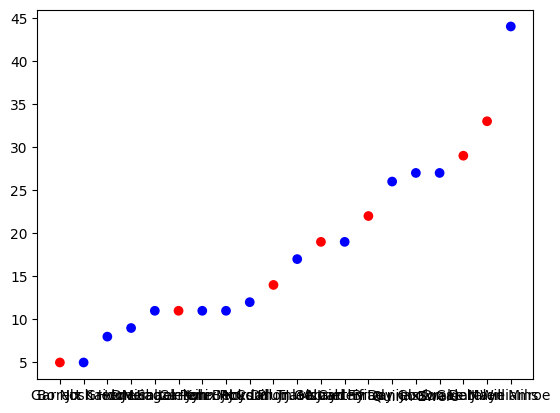

In [ ]:
#Creating Scatter plot based on total sack
total_sacks_df= top_qb[['name', 'total sack', 'Drafted']]
total_sacks_df=total_sacks_df.sort_values(by=['total sack'], ascending=True)

total_sacks_df.loc[total_sacks_df['Drafted'] == 1, 'color'] = 'red'
total_sacks_df.loc[total_sacks_df['Drafted'] == 0, 'color'] = 'blue'
plt.scatter(total_sacks_df['name'],total_sacks_df['total sack'], c=total_sacks_df['color'])


plt.show()

In [ ]:
#Calculating mean of players who were drafted vs players who were not drafted
total_sacks_df.groupby('Drafted')['total sack'].agg('mean')

,total sack
Drafted,
0,17.461538
1,19.000000


In [ ]:
#Calculating mean of players who were drafted vs players who were not drafted
total_sacks_df.drop(total_sacks_df[total_sacks_df['Drafted'] == 0].index, inplace = True)
total_sacks_df.groupby('Drafted')['total sack'].agg('mean')

,total sack
Drafted,
1,19.0


In [ ]:
#Now Calculating the Probability that the Drafted quarterbacks have more than 17 (Average of Undrafted Players)total sacks using Central Limit Theorem
standard_dev4=total_sacks_df.groupby('Drafted')['total sack'].agg('std')
standard_error4=standard_dev4/np.sqrt(7)
z_score4=(17-total_sacks_df.groupby('Drafted')['total sack'].agg('mean'))/standard_error4
z_score4
#P(Sample Mean > 17) = P(Z > -0.533) = 1 - P(Z < -0.533) = 0.702 = 70.2% of Drafted Quarterbacks have greater than 17 (Average of Undrafted Players) total sacks

,total sack
Drafted,
1,-0.533616


###P(Sample Mean > 17) = P(Z > -0.533) = 1 - P(Z < -0.533) = 0.702 = 70.2% of Drafted Quarterbacks have greater than 17 (Average of Undrafted Players) total sacks

#Total Touchdowns Dataframe

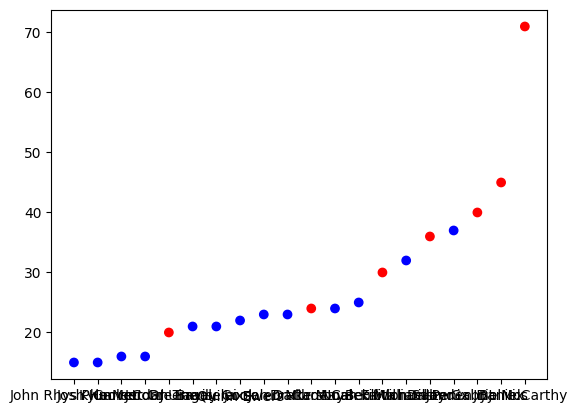

In [ ]:
#Creating Scatter plot based on  total touchdowns
total_td_df= top_qb[['name', 'total TD', 'Drafted']]
total_td_df=total_td_df.sort_values(by=['total TD'], ascending=True)

total_td_df.loc[total_td_df['Drafted'] == 1, 'color'] = 'red'
total_td_df.loc[total_td_df['Drafted'] == 0, 'color'] = 'blue'
plt.scatter(total_td_df['name'],total_td_df['total TD'], c=total_td_df['color'])


plt.show()

In [ ]:
#Calculating mean of players who were drafted vs players who were not drafted
total_td_df.groupby('Drafted')['total TD'].agg('mean')

,total TD
Drafted,
0,22.307692
1,38.000000


In [ ]:
#Calculating mean of players who were drafted vs players who were not drafted
total_td_df.drop(total_td_df[total_td_df['Drafted'] == 0].index, inplace = True)
total_td_df.groupby('Drafted')['total TD'].agg('mean')

,total TD
Drafted,
1,38.0


In [ ]:
#Now Calculating the Probability that the Drafted quarterbacks have more than 22 (Average of Undrafted Players)total touchdowns using Central Limit Theorem
standard_dev5=total_td_df.groupby('Drafted')['total TD'].agg('std')
standard_error5=standard_dev5/np.sqrt(7)
z_score5=(22-total_td_df.groupby('Drafted')['total TD'].agg('mean'))/standard_error5
z_score5
#P(Sample Mean > 22) = P(Z > -2.49) = 1 - P(Z < -2.49) = 0.994 = 99.4% of Drafted Quarterbacks have greater than 22 (Average of Undrafted Players) total touchdowns

,total TD
Drafted,
1,-2.492996


###P(Sample Mean > 22) = P(Z > -2.49) = 1 - P(Z < -2.49) = 0.994 = 99.4% of Drafted Quarterbacks have greater than 22 (Average of Undrafted Players) total touchdowns

#Total Interceptions Dataframe

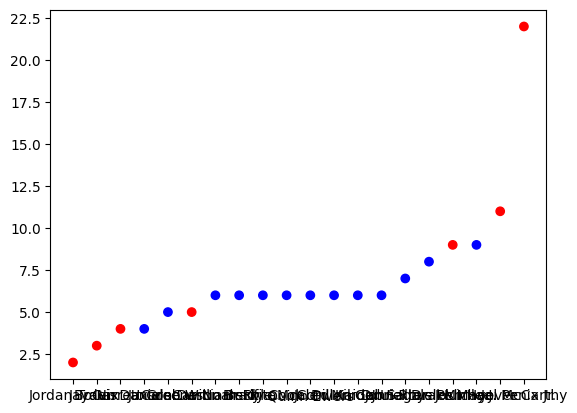

In [ ]:
#Creating Scatter plot based on  total interceptions
total_int_df= top_qb[['name', 'total INT', 'Drafted']]
total_int_df=total_int_df.sort_values(by=['total INT'], ascending=True)

total_int_df.loc[total_int_df['Drafted'] == 1, 'color'] = 'red'
total_int_df.loc[total_int_df['Drafted'] == 0, 'color'] = 'blue'
plt.scatter(total_int_df['name'],total_int_df['total INT'], c=total_int_df['color'])


plt.show()

In [ ]:
#Calculating mean of players who were drafted vs players who were not drafted
total_int_df.groupby('Drafted')['total INT'].agg('mean')

,total INT
Drafted,
0,6.230769
1,8.000000


In [ ]:
#Calculating mean of players who were drafted vs players who were not drafted
total_int_df.drop(total_int_df[total_int_df['Drafted'] == 0].index, inplace = True)
total_int_df.groupby('Drafted')['total INT'].agg('mean')

,total INT
Drafted,
1,8.0


In [ ]:
#Now Calculating the Probability that the Drafted quarterbacks have less than 6 (Average of Undrafted Players)total touchdowns using Central Limit Theorem
standard_dev6=total_int_df.groupby('Drafted')['total INT'].agg('std')
standard_error6=standard_dev6/np.sqrt(7)
z_score6=(6-total_int_df.groupby('Drafted')['total INT'].agg('mean'))/standard_error6
z_score6
#P(Sample Mean < 6) = P(Z < -0.759) = 0.224 = 22.4% of Drafted Quarterbacks have less than 6 (Average of Undrafted Players) total interceptions

,total INT
Drafted,
1,-0.758513


###P(Sample Mean < 6) = P(Z < -0.759) = 0.224 = 22.4% of Drafted Quarterbacks have less than 6 (Average of Undrafted Players) total interceptions